Machine Learning Stripped Helium Stars.  
--- 
By Bethany Ann Ludwig  
Theoretical Data is provided by Ylva Gotberg.  
Optical Data is from the MCPS Survey.  
UV data was created by our group with the Swift UVOT images. 
  
  
From Ylva:   
  
single: single star, always was a single star, main sequence stage  
nyi_binary: not yet interacting binary, not certain it will interact, doesn’t matter for current photometry  
merger: merger product from coalescence of two main sequence stars, just assuming it becomes a ZAMS star with the mass M1+M2  
stripped_MS: binary with a stripped star that was created during the main sequence evolution of the donor. These stripped stars are likely less luminous than what the model predicts.  
stripped_HG: binary with a stripped star that was created during the Hertzsprung gap evolution of the donor.   
stripped_Hg_CEE: binary with a stripped star that was created through common envelope evolution initiated during the Hertzsprung gap evolution of the donor star.   
  
If there is _single after the stripped star flags it means that the stripped star is single. I don’t fully trust that yet, don’t take it seriously.  

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

In [7]:
theory = pd.read_csv("old_dataset.txt",skiprows=8,delimiter="\s+")
theory.head()

,starID,flag,UVW2,UVM2,UVW1,B,V
0,2,nyi_binary,-0.718241,-0.904484,-1.080690,-1.125355,-0.960597
1,12,single,1.382824,1.080028,0.781703,0.338676,0.406610
2,13,single,2.645208,2.321177,2.003559,1.492564,1.544362
3,16,single,1.908162,1.609371,1.317297,0.891691,0.964245
4,21,nyi_binary,-0.230707,-0.513568,-0.788646,-1.160509,-1.075092


A first look at the data, indicates that we can simplify these labels into stripped and not stripped stars. 

In [ ]:
nb = theory.loc[theory["flag"] == "nyi_binary"]; s = theory.loc[theory["flag"] == "single"]
m = theory.loc[theory["flag"] == "merger"]; sms = theory.loc[theory["flag"] == "stripped_MS"]
shg = theory.loc[theory["flag"] == "stripped_HG"]; shgc = theory.loc[theory["flag"] == "stripped_HG_CEE"]

plt.figure(figsize=(5,5))
plt.scatter(nb["UVW2"] - nb["V"], nb["UVW2"],s=10,c="#440154FF",alpha=0.3,label="NYI Binary" )
plt.scatter(s["UVW2"] - s["V"], s["UVW2"],s=10,c="#39568CFF",alpha=0.3,label="Single" )
plt.scatter(m["UVW2"] - m["V"], m["UVW2"],s=10,c="#1F968BFF",alpha=0.3,label="Merger" )
plt.scatter(sms["UVW2"] - sms["V"], sms["UVW2"],s=10,c="#73D055FF",alpha=0.3,label="Stripped MS" )
plt.scatter(shg["UVW2"] - shg["V"], shg["UVW2"],s=10,c="#B8DE29FF",alpha=0.3,label="Stripped HG" )
plt.scatter(shgc["UVW2"] - shgc["V"], shgc["UVW2"],s=10,c="#FDE725FF",edgecolor="black",alpha=0.3,label="Stripped HG CE" )
plt.legend()
plt.ylim(3,-7)

In [3]:
theory["nFlag"] = np.repeat(np.nan,len(theory))
theory["nFlag"].iloc[np.where(theory["flag"]=="single")] = 1
theory["nFlag"].iloc[np.where(theory["flag"]=="nyi_binary")] = 1
theory["nFlag"].iloc[np.where(theory["flag"]=="merger")] = 1
theory["nFlag"].iloc[np.where(theory["flag"]=="stripped_MS")] = 2
theory["nFlag"].iloc[np.where(theory["flag"]=="stripped_HG")] = 2
theory["nFlag"].iloc[np.where(theory["flag"]=="stripped_Hg_CEE")] = 2

C:\Users\Betha\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


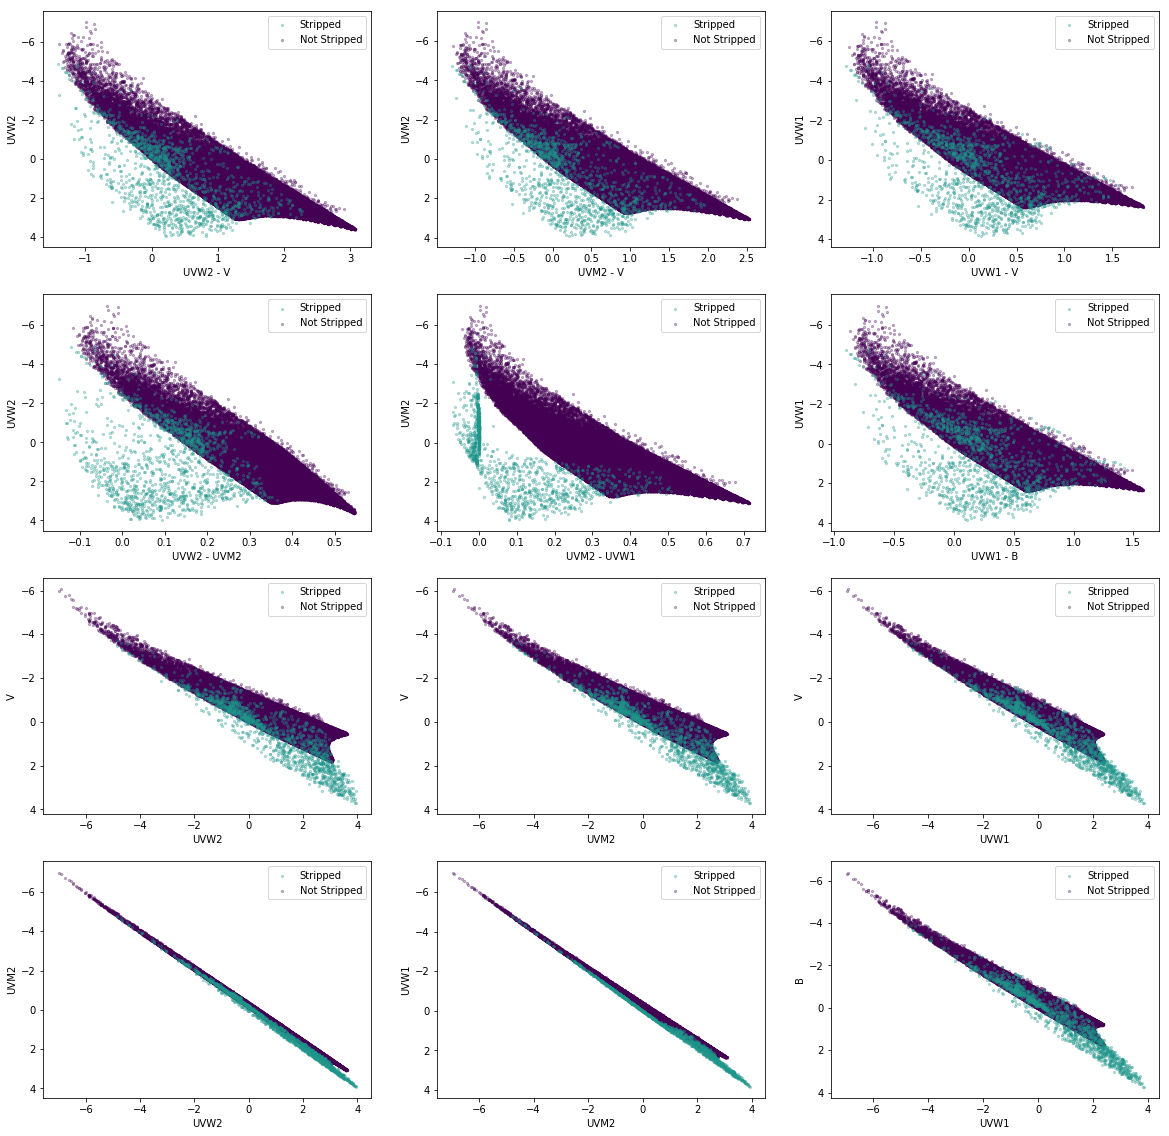

In [6]:
def plot(axis,dataframe,filter1,filter2):
    stripped = dataframe.loc[dataframe["nFlag"] == 2]
    notstripped = dataframe.loc[dataframe["nFlag"] == 1]
    
    axis.scatter(stripped[filter1] - stripped[filter2],stripped[filter1],c = "#1F968BFF", s=5,alpha=0.3,label="Stripped",zorder=1)
    axis.scatter(notstripped[filter1] - notstripped[filter2],notstripped[filter1],c = "#440154FF", s=5,alpha=0.3,label="Not Stripped",zorder=0)

    axis.set_ylim(axis.get_ylim()[::-1])
    
    axis.set_ylabel(filter1); axis.set_xlabel(filter1 +" - "+filter2)

    axis.legend()
    
def plotS(axis,dataframe,filter1,filter2):
    stripped = dataframe.loc[dataframe["nFlag"] == 2]
    notstripped = dataframe.loc[dataframe["nFlag"] == 1]
    
    axis.scatter(stripped[filter1],stripped[filter2],c = "#1F968BFF", s=5,alpha=0.3,label="Stripped",zorder=1)
    axis.scatter(notstripped[filter1] ,notstripped[filter2],c = "#440154FF", s=5,alpha=0.3,label="Not Stripped",zorder=0)

    axis.set_ylim(axis.get_ylim()[::-1])
    
    axis.set_ylabel(filter2); axis.set_xlabel(filter1)

    axis.legend()    
    
f, axes = plt.subplots(4,3,figsize=(20,20))

plot(axes[0,0],theory,"UVW2","V")
plot(axes[0,1],theory,"UVM2","V")
plot(axes[0,2],theory,"UVW1","V")

plot(axes[1,0],theory,"UVW2","UVM2")
plot(axes[1,1],theory,"UVM2","UVW1")
plot(axes[1,2],theory,"UVW1","B")

plotS(axes[2,0],theory,"UVW2","V")
plotS(axes[2,1],theory,"UVM2","V")
plotS(axes[2,2],theory,"UVW1","V")

plotS(axes[3,0],theory,"UVW2","UVM2")
plotS(axes[3,1],theory,"UVM2","UVW1")
plotS(axes[3,2],theory,"UVW1","B")



In [ ]:
stripped = theory.loc[theory["nFlag"] == "2"]

In [ ]:
X = [theory["UVW2"],theory["UVM2"],theory["UVW1"],theory["B"],theory["V"]]

In [ ]:
pca = PCA(n_components=3,whiten=True)

In [ ]:
pca.fit(X)

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
X = pca.transform(X)